# GOAL

We're going to be building a model that can classify fruits. 

Steps to get there: 
1. Install Dependencies and Setup
2. Perform some data exploration
3. Load data in from kaggle 
4. Scale data to be in the correct format for our model
5. Make seperate training, validation, and testing sets
6. Build custom deep learning model (hint add multiple input, output, and hidden layers)
7. Train model (hint hint use the fit() function)
8. Plot performance (how well did we do?!?!?) 
9. Do some quick testing with our own image
10. Save the model
11. #DONE 


# 1. Install Dependencies and Setup

We now have new and improved documentation at:

https://docs.google.com/document/d/1Nbtx1lg2J6yfMFdQdcewOzdcUaUSZ7qScDBjyGNJVQE/edit?usp=sharing

^^^ Do all of this stuff first before proceeding here! ^^^


By the way, here are some useful definitions that you should know. 

Labels: targets - in this case, the fruit. 

Features/inputs: inputs - in this case, the image. 

Training data - the data we feed to our model. 

Validation data - the data we use to evaluate our model to see how well it trained.

Testing data - the data we use to test our model to see how well it generalizes (i.e. how well it performs on recognizing a fruit.).

In [2]:
import tensorflow as tf
import os

2025-04-13 12:27:33.501194: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-13 12:27:33.736913: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744561653.825257    2759 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744561653.852041    2759 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-13 12:27:34.074095: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [3]:
##! ARE YOU A WINDOWS USER OR HAVE A GPU ON YOUR COMPUTER? UNCOMMENT THIS CELL!!!!!!!!!!
# (ew)

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

tf.config.list_physical_devices('GPU')

2025-04-13 12:27:38.122767: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


[]

# 2. Check out our training set

Ok - So, the goal here is going to be to split up our training data in order to train our models 

Like we said in the doc, we need to split our data into training, validation, and testing sets. 

We're going to start by simply writing our directory and checking out what our data looks like. 


In [4]:
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os


In [5]:
#TODO: Change 'data' to the name of your training set directory
# You should see a list of classes
data_dir = 'fruits-360_dataset_100x100/fruits-360/Training'
os.listdir(data_dir)

['Cucumber Ripe 2',
 'Hazelnut 1',
 'Pear Monster 1',
 'Fig 1',
 'Watermelon 1',
 'Tomato 2',
 'Cauliflower 1',
 'Pepper Green 1',
 'Apple Red Yellow 1',
 'Apple 6',
 'Passion Fruit 1',
 'Grape White 1',
 'Apple Golden 1',
 'Lychee 1',
 'Tomato 1',
 'Cucumber 3',
 'Pomelo Sweetie 1',
 'Physalis 1',
 'Nut Forest 1',
 'Limes 1',
 'Clementine 1',
 'Peach Flat 1',
 'Mango Red 1',
 'Orange 1',
 'Grape Pink 1',
 'Pepper Orange 1',
 'Apple Red 2',
 'Cucumber Ripe 1',
 'Plum 1',
 'Grape White 2',
 'Peach 1',
 'Grapefruit White 1',
 'Huckleberry 1',
 'Dates 1',
 'Apple Red 3',
 'Potato Red 1',
 'Apple Red Delicious 1',
 'Strawberry Wedge 1',
 'Tomato Cherry Red 1',
 'Tomato Yellow 1',
 'Quince 1',
 'Granadilla 1',
 'Pepper Yellow 1',
 'Pepper Red 1',
 'Cantaloupe 1',
 'Pineapple 1',
 'Cherry Rainier 1',
 'Plum 2',
 'Zucchini dark 1',
 'Apple hit 1',
 'Apple Golden 2',
 'Cocos 1',
 'Pear 2',
 'Tamarillo 1',
 'Blueberry 1',
 'Cherry Wax Yellow 1',
 'Plum 3',
 'Pear 1',
 'Nectarine Flat 1',
 'Appl

All this cell below is doing is just checking out what our data actually looks like.

(100, 100, 3)


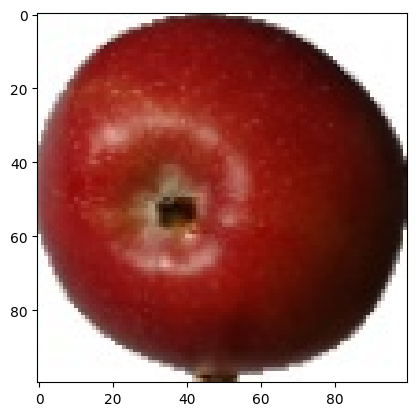

In [6]:
import matplotlib.image as mpimg

img = mpimg.imread('/home/evanteal15/mdst/mdst-classifer-starter/mdst_fruit_classifier/classifier/fruits-360_dataset_100x100/fruits-360/Training/Apple Braeburn 1/r_1_100.jpg')
print(img.shape)
plt.imshow(img)

# 3. Load Data

Cool - so we see what our data looks like. Now we're going to load it into our model. 

In [7]:
import numpy as np
from matplotlib import pyplot as plt

A machine learning model needs to be in the right shape and format in order to be trained. 

In [8]:
# This formats our data...
# TODO: Ensure the image size is kept at (100, 100)
data = tf.keras.utils.image_dataset_from_directory(data_dir, image_size=(100, 100), shuffle=True)

Found 54866 files belonging to 109 classes.


In [9]:
# Each time we call this, it gives us a new set of data
data_iterator = data.as_numpy_iterator()

In [10]:
# 32 images per batch, 100x100, 3 channels (R, G, B)
batch = data_iterator.next()
batch[0].shape

(32, 100, 100, 3)

Real quick, what is this doing? 

This is taking our data and formatting it into a shape that our model can understand. 

We're going to scale our data down to a range between 0 and 1. 


# 4. Scale Data

1. Our tensorflow model works with values between 0 and 1.
2. Our images give us pixel R, G, B values from 0-255.

Thus, we need to scale our input data down.

In [11]:
# Hint: Pixel values range from 0-255. We want to scale x to range between 0-1.
# x represents our data, and y represents our class. Therefore, we shouldn't worry about y

# TODO: Uncomment + complete the following statement:
data = data.map(lambda x,y: (x/255, y))

In [12]:
# This will now give us an iterator with our SCALED data!
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()


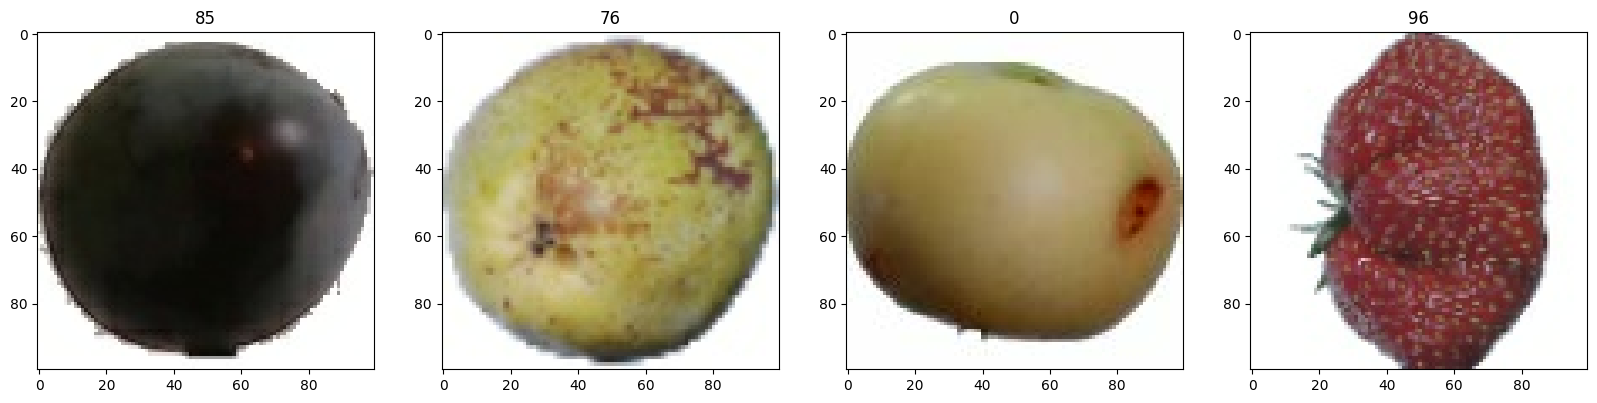

In [13]:
# Once previous TODOs are complete, you should see 4 100x100 images here (of fruits, hopefully)
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

# 5. Include Test Data

1. Now, it's your turn. Using the '+ Code' button, complete the same steps. Except this time, with the testing directory...

**Note: for functionality, you'll only need to pattern-match some of the lines.**

Found 18366 files belonging to 109 classes.


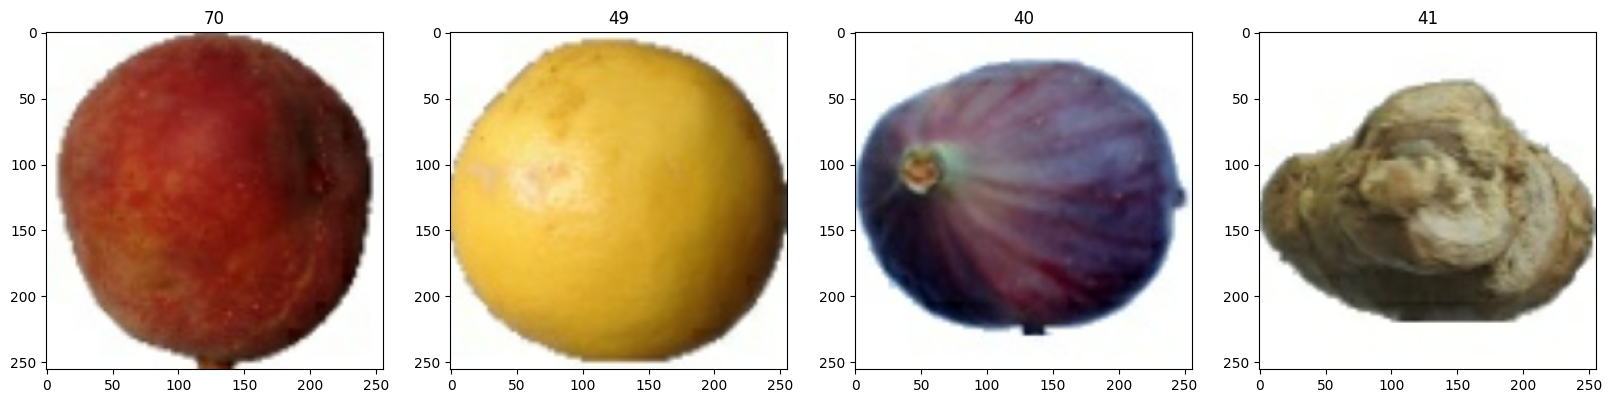

In [14]:
test_data_dir = 'fruits-360_dataset_100x100/fruits-360/Test'
os.listdir(test_data_dir)

# This formats our data...
# TODO: Ensure the image size is kept at (100, 100)
test_data = tf.keras.utils.image_dataset_from_directory(test_data_dir)

# # Each time we call this, it gives us a new set of data
# data_iterator = data.as_numpy_iterator()

# # 32 images per batch, 100x100, 3 channels (R, G, B)
# batch = data_iterator.next()
# batch[0].shape

test_data = test_data.map(lambda x,y: (x/255, y))

# This will now give us an iterator with our SCALED data!
scaled_iterator = test_data.as_numpy_iterator()
batch = scaled_iterator.next()

# Once previous TODOs are complete, you should see 4 100x100 images here (of fruits, hopefully)
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

# 6. Create Validation Set

Now, lets set up our validation set. 

We're going to steal from our training set to form our validation set. This is not usually optimal, but should work for our purposes, especially since we've now shuffled our data when we pull from our Fruits Training directory

In [15]:
train_size = int(len(data) * 0.7)
val_size = int(len(data) * 0.3)
# Leave our test data alone

# TODO: put in the name of your test_data here
test_size = int(len(test_data))

# TODO: Make sure train_size + val_size + test_size lines up with the total size of your data...
print(train_size + val_size + test_size)

2288


In [16]:
# Notice how we separate the training + validation data...
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, RandomContrast

# Instantiate data augmentation layers outside the lambda function
random_flip = RandomFlip("horizontal_and_vertical")
random_rotation = RandomRotation(0.2)
random_zoom = RandomZoom(0.2)
random_contrast = RandomContrast(0.2)

# Apply data augmentation transformations
data = data.map(lambda x, y: (random_flip(x), y))
data = data.map(lambda x, y: (random_rotation(x), y))
data = data.map(lambda x, y: (random_zoom(x), y))
data = data.map(lambda x, y: (random_contrast(x), y))
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = test_data.take(test_size)

# 7. Build Deep Learning Model
This can get complicated - so if you made it this far, you're doing great! (We will get into this more the second week)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, GlobalAveragePooling2D, BatchNormalization, Flatten, Activation
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications import MobileNetV2

In [18]:
base_model = MobileNetV2(input_shape=(100, 100, 3),
                         include_top=False,
                         weights='imagenet')

base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    # Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    # Dropout(0.2),
    Dense(109, activation='softmax')
])

# model = Sequential()

/tmp/ipykernel_2759/3613339079.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=(100, 100, 3),


Layers we're looking for: 
Activation, 
MaxPooling2D,
Conv2D,
Dropout,
Flatten,
Dense



In [37]:
# TODO: Add in all your layers here...
model.add(Conv2D(16, (3, 3), activation='relu', kernel_regularizer=l2(0.01) , input_shape=(100, 100, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3, 3), activation='relu',  kernel_regularizer=l2(0.01) , input_shape=(100, 100, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3, 3), activation='relu',  kernel_regularizer=l2(0.01) , input_shape=(100, 100, 3)))
model.add(MaxPooling2D())
# model.add(Dropout(.2))
model.add(Flatten())
model.add(Dense(109))
model.add(Activation('relu'))
model.add(Dropout(.2))
model.add(Dense(109, activation = 'softmax'))


ValueError: Input 0 of layer "conv2d_1" is incompatible with the layer: expected min_ndim=4, found ndim=2. Full shape received: (None, 109)

In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 4, 4, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 109)            │        28,013 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,073,197 (11.72 MB)

 Trainable params: 815,213 (3.11 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

# 8. Train

Now, time to train our model! 

In [21]:
logdir='logs'

In [22]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

Think of how many epochs you want to train for (hint hint what you will use for your validation data)

In [23]:
# Train the model with the base model frozen
hist = model.fit(train, validation_data=val, callbacks=tensorboard_callback, epochs=10)

# Unfreeze the base model for fine-tuning
base_model.trainable = True

# Recompile the model with a lower learning rate for fine-tuning
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),  # Lower LR for fine-tuning
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Continue training the model with the base model unfrozen
hist = model.fit(train, validation_data=val, callbacks=tensorboard_callback, epochs=15, initial_epoch=10)

Epoch 1/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 394s 324ms/step - accuracy: 0.5560 - loss: 5.2240 - val_accuracy: 0.8577 - val_loss: 1.2715
Epoch 2/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 357s 298ms/step - accuracy: 0.7908 - loss: 1.3888 - val_accuracy: 0.8793 - val_loss: 1.0823
Epoch 3/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 389s 324ms/step - accuracy: 0.8043 - loss: 1.2634 - val_accuracy: 0.8729 - val_loss: 1.0097
Epoch 4/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 338s 282ms/step - accuracy: 0.8138 - loss: 1.1995 - val_accuracy: 0.8547 - val_loss: 1.0370
Epoch 5/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 315s 263ms/step - accuracy: 0.8186 - loss: 1.1310 - val_accuracy: 0.8880 - val_loss: 0.9401
Epoch 6/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 328s 273ms/step - accuracy: 0.8237 - loss: 1.1142 - val_accuracy: 0.9117 - val_loss: 0.8340
Epoch 7/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - accuracy: 0.8237 - loss: 1.0734

2025-04-13 13:09:06.235100: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 3840128 bytes after encountering the first element of size 3840128 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


1200/1200 ━━━━━━━━━━━━━━━━━━━━ 373s 311ms/step - accuracy: 0.8237 - loss: 1.0734 - val_accuracy: 0.8814 - val_loss: 0.9179
Epoch 8/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 388s 324ms/step - accuracy: 0.8247 - loss: 1.0626 - val_accuracy: 0.9002 - val_loss: 0.8375
Epoch 9/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 398s 331ms/step - accuracy: 0.8325 - loss: 1.0214 - val_accuracy: 0.9041 - val_loss: 0.8268
Epoch 10/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - accuracy: 0.8285 - loss: 1.0200

2025-04-13 13:30:37.472965: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 3840128 bytes after encountering the first element of size 3840128 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


1200/1200 ━━━━━━━━━━━━━━━━━━━━ 562s 466ms/step - accuracy: 0.8285 - loss: 1.0200 - val_accuracy: 0.9103 - val_loss: 0.7873
Epoch 11/15
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 1007s 815ms/step - accuracy: 0.5550 - loss: 2.1363 - val_accuracy: 0.7808 - val_loss: 1.1611
Epoch 12/15
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 821s 684ms/step - accuracy: 0.8641 - loss: 0.9319 - val_accuracy: 0.9564 - val_loss: 0.6265
Epoch 13/15
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 1009s 841ms/step - accuracy: 0.9166 - loss: 0.7527 - val_accuracy: 0.9832 - val_loss: 0.5291
Epoch 14/15
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 1051s 876ms/step - accuracy: 0.9381 - loss: 0.6592 - val_accuracy: 0.9911 - val_loss: 0.4802
Epoch 15/15
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 1035s 863ms/step - accuracy: 0.9506 - loss: 0.5966 - val_accuracy: 0.9944 - val_loss: 0.4431


# 9. Plot Performance

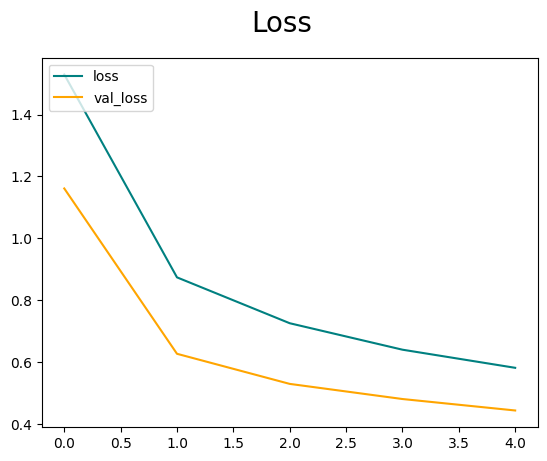

In [24]:
# Show our loss + validation loss (should be decreasing)
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

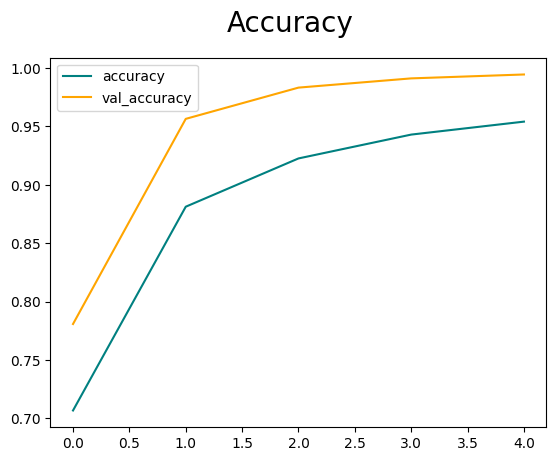

In [25]:
# Show our accuracy (should be increasing)
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 10. Quick Test-Throw in our own image

Let's put our image into the model and see how well it does. 

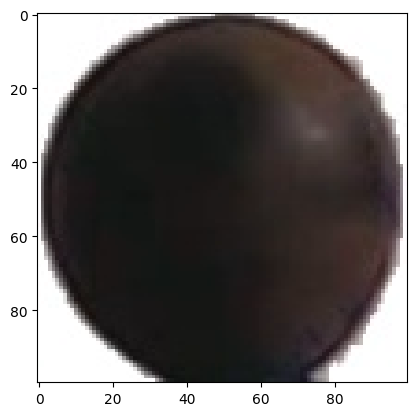

In [26]:
# TODO: put an image of a fruit into the local directory, and replace 'pomelo.png' with the file name

# The colors here will probably show up unexpected. This is because cv2 uses G, B, R instead of R, G, B...
# Let's fix that in the next cell
import cv2
img = cv2.imread('/home/evanteal15/mdst/mdst-classifer-starter/mdst_fruit_classifier/156_100.jpg')
plt.imshow(img)
plt.show()

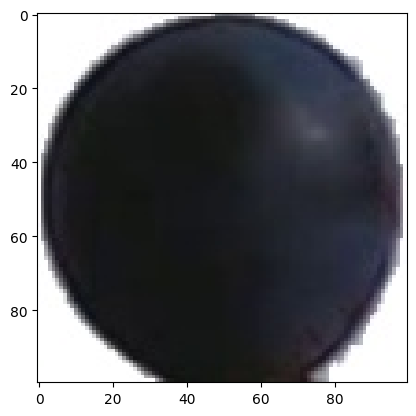

In [27]:
# Resize the image
resize = tf.image.resize(img, (100, 100))

# Convert GBR to RGB by reordering the channels
resize_rgb = tf.reverse(resize, axis=[-1])

# Display the corrected RGB image
plt.imshow(resize_rgb.numpy().astype(int))
plt.show()

In [28]:
# The following line just wraps our image in another set of parenthesis
# This allows the argmax call to work
np.expand_dims(resize_rgb, 0).shape
yhat = model.predict(np.expand_dims(resize_rgb/255, 0))

# This takes the argmax (shows us our predicted class)
predicted_class_index = np.argmax(yhat[0])
print(predicted_class_index)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
43


However, we want more than just the class number... we want its name so we can use it in the API!

This is the (kind of) gross and inefficient way we found of doing it...
Feel free to implement this differently if you like- perhaps by outputting the dictionary then hardcoding it

In [29]:
# TODO: Replace "Test" with the name of your testing or training directory

# Goes thorugh your directory, sorts each name alphabetically.
# Tensorflow will sort your directory alphabetically, so this match names to the previous cell's number
directory_names = sorted([name for name in os.listdir("/home/evanteal15/mdst/mdst-classifer-starter/mdst_fruit_classifier/classifier/fruits-360_dataset_100x100/fruits-360/Test") if os.path.isdir(os.path.join("/home/evanteal15/mdst/mdst-classifer-starter/mdst_fruit_classifier/classifier/fruits-360_dataset_100x100/fruits-360/Test", name))])

fruits_dict = {}

for index, name in enumerate(directory_names):
    fruits_dict.update({index: name})

fruit = fruits_dict[predicted_class_index]

print(fruit)

Grape Blue 1


# 11. Save the Model
So we can later use it in our API!

In [30]:
from tensorflow.keras.models import load_model

# Save the model and put it into a file called fruitclassifier.keras
# After running this cell, you should have a black-box like predictor file!
model.save('fruitclassifier.keras')
new_model = load_model('fruitclassifier.keras')